In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
d = pd.read_csv('us_covid19_daily-1.csv')
d.head()

,Date,Positive,Hospitalized,Death
0,17-03-2020,10021,325,124
1,18-03-2020,13385,416,155
2,19-03-2020,18085,617,203
3,20-03-2020,24197,1042,273
4,21-03-2020,31013,1492,335


In [131]:
df = d.drop(['Positive','Death'],axis=1)

In [132]:
df.head()

,Date,Hospitalized
0,17-03-2020,325
1,18-03-2020,416
2,19-03-2020,617
3,20-03-2020,1042
4,21-03-2020,1492


In [133]:
df.tail()

,Date,Hospitalized
260,02-12-2020,100322
261,03-12-2020,100755
262,04-12-2020,101276
263,05-12-2020,101190
264,06-12-2020,101487


In [134]:
df.dtypes

Date            object
Hospitalized     int64
dtype: object

In [135]:
date = pd.date_range(start='03/17/2020',end='12/06/2020',freq='D')

In [136]:
df['date'] = date

In [137]:
df.head()

,Date,Hospitalized,date
0,17-03-2020,325,2020-03-17
1,18-03-2020,416,2020-03-18
2,19-03-2020,617,2020-03-19
3,20-03-2020,1042,2020-03-20
4,21-03-2020,1492,2020-03-21


In [138]:
df = df.drop('Date',axis=1)

In [139]:
df = df.set_index('date')
df.head()

,Hospitalized
date,
2020-03-17,325
2020-03-18,416
2020-03-19,617
2020-03-20,1042
2020-03-21,1492


In [140]:
df.tail()

,Hospitalized
date,
2020-12-02,100322
2020-12-03,100755
2020-12-04,101276
2020-12-05,101190
2020-12-06,101487


In [141]:
df.dtypes

Hospitalized    int64
dtype: object

In [142]:
df.isnull().sum()

Hospitalized    0
dtype: int64

In [143]:
df.replace(df['Hospitalized'][3],np.NaN,inplace=True)

In [144]:
df.head()

,Hospitalized
date,
2020-03-17,325.0
2020-03-18,416.0
2020-03-19,617.0
2020-03-20,NaN
2020-03-21,1492.0


In [145]:
df.isnull().sum()

Hospitalized    1
dtype: int64

In [146]:
df = df.interpolate(method='linear')

In [147]:
df.head()

,Hospitalized
date,
2020-03-17,325.0
2020-03-18,416.0
2020-03-19,617.0
2020-03-20,1054.5
2020-03-21,1492.0


In [148]:
df.replace(df['Hospitalized'][3],np.NaN,inplace=True)

In [149]:
df = df.rolling(window=3,min_periods=2).mean()

In [150]:
df.head()

,Hospitalized
date,
2020-03-17,NaN
2020-03-18,370.500000
2020-03-19,452.666667
2020-03-20,516.500000
2020-03-21,1054.500000


In [151]:
df.replace(df['Hospitalized'][3],np.NaN,inplace=True)

In [152]:
df = df.interpolate(method='linear')

In [153]:
df.head()

,Hospitalized
date,
2020-03-17,NaN
2020-03-18,370.500000
2020-03-19,452.666667
2020-03-20,753.583333
2020-03-21,1054.500000


In [154]:
df = df[1:]

In [155]:
df.head()

,Hospitalized
date,
2020-03-18,370.500000
2020-03-19,452.666667
2020-03-20,753.583333
2020-03-21,1054.500000
2020-03-22,1832.500000


In [156]:
df.tail()

,Hospitalized
date,
2020-12-02,98416.000000
2020-12-03,99951.333333
2020-12-04,100784.333333
2020-12-05,101073.666667
2020-12-06,101317.666667


In [157]:
df.isnull().sum()

Hospitalized    0
dtype: int64

<AxesSubplot:xlabel='date'>

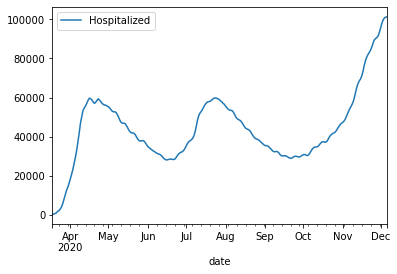

In [158]:
df.plot()

**Decomposition**

In [159]:
from statsmodels.tsa.seasonal import seasonal_decompose

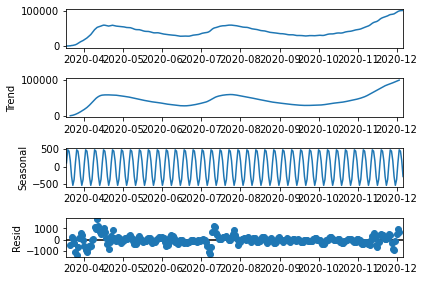

In [160]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot()
plt.show()

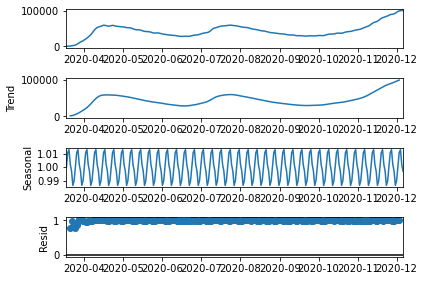

In [161]:
de = seasonal_decompose(df,model='multiplicative')
de.plot()
plt.show()

**Stationarity**

In [162]:
from statsmodels.tsa.stattools import adfuller

In [163]:
obs = df.values
adf = adfuller(obs)

In [164]:
adf

(-1.4271941271177966,
 0.5691717292261251,
 16,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 3497.403190911204)

**It is not stationary**

In [165]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

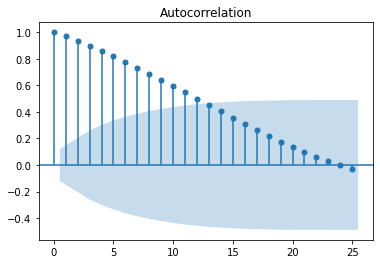

In [166]:
plot_acf(df);

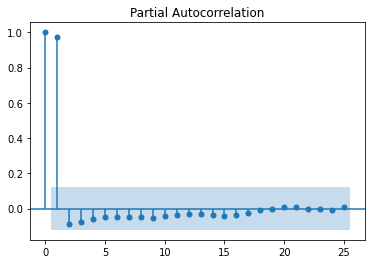

In [167]:
plot_pacf(df);

**May be AR Characterstics**

In [168]:
from datetime import datetime,timedelta

In [169]:
trainend = datetime(2020,11,6)
testend  = datetime(2020,12,6)

In [170]:
train  = df[:trainend]
test   = df[trainend  + timedelta(days=1):testend]

In [171]:
print('train:',train)
print('test:',test)

train:             Hospitalized
date                    
2020-03-18    370.500000
2020-03-19    452.666667
2020-03-20    753.583333
2020-03-21   1054.500000
2020-03-22   1832.500000
...                  ...
2020-11-02  47958.000000
2020-11-03  48966.666667
2020-11-04  50483.666667
2020-11-05  52047.666667
2020-11-06  53526.666667

[234 rows x 1 columns]
test:              Hospitalized
date                     
2020-11-07   54817.000000
2020-11-08   55976.000000
2020-11-09   57457.666667
2020-11-10   59491.333333
2020-11-11   62363.000000
2020-11-12   64976.000000
2020-11-13   67129.666667
2020-11-14   68473.333333
2020-11-15   69463.000000
2020-11-16   71055.666667
2020-11-17   73552.666667
2020-11-18   76657.666667
2020-11-19   79092.666667
2020-11-20   80826.000000
2020-11-21   82102.333333
2020-11-22   83169.000000
2020-11-23   84402.333333
2020-11-24   86011.666667
2020-11-25   88064.666667
2020-11-26   89593.000000
2020-11-27   90185.000000
2020-11-28   90758.666667
2020-11-29   9

In [172]:
import itertools

**ARIMA**

In [173]:
from statsmodels.tsa.arima_model import ARIMA

In [174]:
p = q = range(0,2)
d= range(0,2)
pdq = list(itertools.product(p,d,q))

model_pdq = [(x[0],x[1],x[2],7)     for x in pdq ]
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [175]:
model_pdq

[(0, 0, 0, 7),
 (0, 0, 1, 7),
 (0, 1, 0, 7),
 (0, 1, 1, 7),
 (1, 0, 0, 7),
 (1, 0, 1, 7),
 (1, 1, 0, 7),
 (1, 1, 1, 7)]

In [176]:
dfobj = pd.DataFrame(columns=['param','AIC'])

In [177]:
for param in pdq:
    try:
        arima_mod = ARIMA(train,order=param)
        a=arima_mod.fit()
        print('ARIMA{} - AIC:{}'.format(param,a.aic))
        dfobj=dfobj.append({'param':param,'AIC':a.aic},ignore_index=True)
    except:
        continue
    
    

ARIMA(0, 0, 0) - AIC:5112.483435114683
ARIMA(0, 0, 1) - AIC:4802.461008774172
ARIMA(0, 1, 0) - AIC:3930.352086601976
ARIMA(0, 1, 1) - AIC:3726.4030958262715
ARIMA(1, 0, 0) - AIC:3965.805413710356
ARIMA(1, 1, 0) - AIC:3479.0270344183573
ARIMA(1, 1, 1) - AIC:3467.3115952214366


In [178]:
dfobj.sort_values(by='AIC')

,param,AIC
6,"(1, 1, 1)",3467.311595
5,"(1, 1, 0)",3479.027034
3,"(0, 1, 1)",3726.403096
2,"(0, 1, 0)",3930.352087
4,"(1, 0, 0)",3965.805414
1,"(0, 0, 1)",4802.461009
0,"(0, 0, 0)",5112.483435


In [179]:
arima = ARIMA(train,order=(1,1,1))
a=arima.fit()
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Hospitalized   No. Observations:                  233
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1729.656
Method:                       css-mle   S.D. of innovations            403.473
Date:                Tue, 23 Nov 2021   AIC                           3467.312
Time:                        22:59:43   BIC                           3481.116
Sample:                    03-19-2020   HQIC                          3472.878
                         - 11-06-2020                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  265.9069    305.416      0.871      0.384    -332.698     864.512
ar.L1.D.Hospitalized     0.8996      0.029     30.949      0.000       0.843       0.957
ma.L1.D.Hospitalized     0.2033      0.051      3.993      0.000       0.104       0.303
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1115           +0.0000j            1.1115            0.0000
MA.1           -4.9179           +0.0000j            4.9179            0.5000
-----------------------------------------------------------------------------
"""

In [180]:
pred_start = test.index[0]
pred_end = test.index[-1]

In [181]:
predictions = a.predict(start=pred_start,end=pred_end)
predictions

2020-11-07    1363.621397
2020-11-08    1253.461377
2020-11-09    1154.356353
2020-11-10    1065.196913
2020-11-11     984.984977
2020-11-12     912.822629
2020-11-13     847.902059
2020-11-14     789.496527
2020-11-15     736.952223
2020-11-16     689.680948
2020-11-17     647.153535
2020-11-18     608.893916
2020-11-19     574.473803
2020-11-20     543.507885
2020-11-21     515.649520
2020-11-22     490.586853
2020-11-23     468.039324
2020-11-24     447.754529
2020-11-25     429.505395
2020-11-26     413.087634
2020-11-27     398.317460
2020-11-28     385.029532
2020-11-29     373.075101
2020-11-30     362.320344
2020-12-01     352.644870
2020-12-02     343.940368
2020-12-03     336.109398
2020-12-04     329.064297
2020-12-05     322.726200
2020-12-06     317.024156
Freq: D, dtype: float64

In [182]:
forecast = a.forecast(len(test))
forecast

(array([54890.288064  , 56143.74944089, 57298.10579388, 58363.30270661,
        59348.28768383, 60261.11031254, 61109.01237168, 61898.50889881,
        62635.46112157, 63325.14207005, 63972.29560479, 64581.18952105,
        65155.66332384, 65699.17120855, 66214.82072833, 66705.40758098,
        67173.44690493, 67621.20143443, 68050.70682934, 68463.79446296,
        68862.11192299, 69247.14145515, 69620.21655589, 69982.53689999,
        70335.18177009, 70679.12213851, 71015.23153665, 71344.29583355,
        71667.02203317, 71984.04618879]),
 array([  403.4726319 ,   939.54090829,  1562.81519825,  2243.08372578,
         2961.12331289,  3703.66507456,  4461.12996526,  5226.41712584,
         5994.17942393,  6760.35599337,  7521.85360995,  8276.32049044,
         9021.98065494,  9757.50969405, 10481.93982068, 11194.5862128 ,
        11894.98918857, 12582.86837612, 13258.08611199, 13920.6180325 ,
        14570.52933233, 15207.95552905, 15833.08683766, 16446.15545633,
        17047.42521214

In [183]:
df_fc = test.copy()
df_fc['Hospitalized_Forecast'] = forecast[0]
df_fc.head()

,Hospitalized,Hospitalized_Forecast
date,,
2020-11-07,54817.000000,54890.288064
2020-11-08,55976.000000,56143.749441
2020-11-09,57457.666667,57298.105794
2020-11-10,59491.333333,58363.302707
2020-11-11,62363.000000,59348.287684


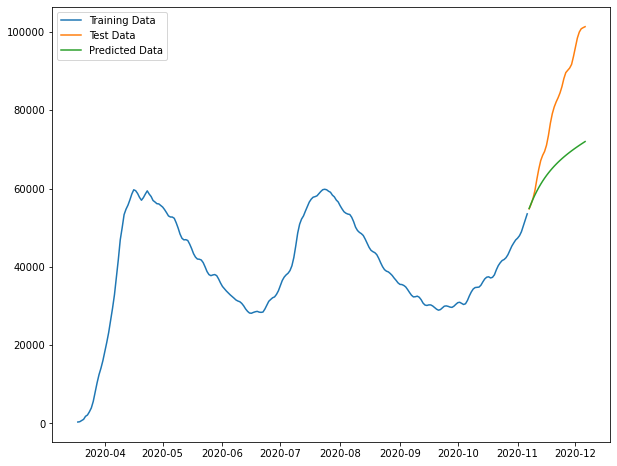

In [192]:
plt.figure(figsize=(10,8))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(df_fc.index,df_fc['Hospitalized_Forecast'],label='Predicted Data')
plt.legend()
plt.show()

In [195]:
from statsmodels.graphics.gofplots import qqplot

In [196]:
residuals = df_fc['Hospitalized'] - df_fc['Hospitalized_Forecast']

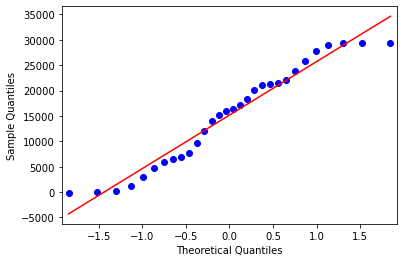

In [200]:
qqplot(residuals,line='r');

In [206]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_fc['Hospitalized'],df_fc['Hospitalized_Forecast'],squared=False)

17996.70429485404

In [201]:
def MAPE(ytrue,ypred):
    return np.mean((np.abs(ytrue-ypred))/ytrue)*100

In [203]:
MAPE(df_fc['Hospitalized'],df_fc['Hospitalized_Forecast'])

17.143716256719696

**SARIMA**

In [218]:
dfobj1 = pd.DataFrame(columns=['param','seasonal','AIC'])
dfobj1.head()

,param,seasonal,AIC


In [219]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

In [223]:
for param in pdq:
    for param_seasonal in model_pdq:
        mod = sm.tsa.statespace.SARIMAX(train,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
        model = mod.fit()
        dfobj1 = dfobj1.append({'param':param,'seasonal':param_seasonal,'AIC':model.aic},ignore_index=True)
        dfobj1.head()
        

In [226]:
dfobj1.sort_values(by='AIC')

,param,seasonal,AIC
63,"(1, 1, 1)","(1, 1, 1, 7)",3159.694463
59,"(1, 1, 1)","(0, 1, 1, 7)",3164.254034
55,"(1, 1, 0)","(1, 1, 1, 7)",3172.427893
51,"(1, 1, 0)","(0, 1, 1, 7)",3176.696769
54,"(1, 1, 0)","(1, 1, 0, 7)",3205.232302
...,...,...,...
9,"(0, 0, 1)","(0, 0, 1, 7)",5230.315488
12,"(0, 0, 1)","(1, 0, 0, 7)",5260.307411
1,"(0, 0, 0)","(0, 0, 1, 7)",5304.313104
8,"(0, 0, 1)","(0, 0, 0, 7)",5430.396364


In [228]:
sar = SARIMAX(train,
             order=(1,1,1),
             seasonal_order=(1,1,1,7),
             enforce_stationarity=False,
             enforce_invertibility=False)
sar_mod = sar.fit()

In [230]:
sar_predict = sar_mod.predict(start=pred_start,end=pred_end)
sar_predict

2020-11-07    54769.585641
2020-11-08    55722.277317
2020-11-09    56781.271815
2020-11-10    58186.689458
2020-11-11    59867.605823
2020-11-12    61470.156964
2020-11-13    62727.141407
2020-11-14    63722.462321
2020-11-15    64449.096289
2020-11-16    65288.098367
2020-11-17    66487.124913
2020-11-18    67933.162677
2020-11-19    69292.345586
2020-11-20    70270.061944
2020-11-21    70995.275762
2020-11-22    71469.330665
2020-11-23    72069.454871
2020-11-24    73044.027211
2020-11-25    74271.094771
2020-11-26    75420.039238
2020-11-27    76190.262906
2020-11-28    76718.957572
2020-11-29    77008.552093
2020-11-30    77435.007757
2020-12-01    78246.357503
2020-12-02    79318.441751
2020-12-03    80320.847043
2020-12-04    80951.400142
2020-12-05    81348.522016
2020-12-06    81514.496360
Freq: D, Name: predicted_mean, dtype: float64

In [231]:
df_fc['sar_forecast'] = sar_predict

In [232]:
mean_squared_error(df_fc['Hospitalized'],df_fc['sar_forecast'],squared=False)

12307.652502164136

In [233]:
MAPE(df_fc['Hospitalized'],df_fc['sar_forecast'])

11.93694332198674

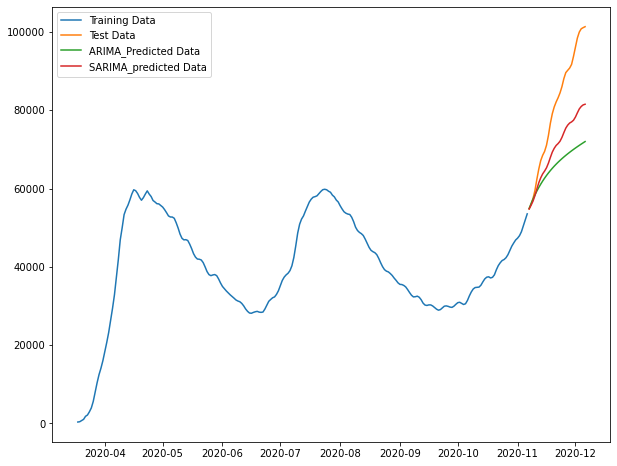

In [234]:
plt.figure(figsize=(10,8))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(df_fc.index,df_fc['Hospitalized_Forecast'],label='ARIMA_Predicted Data')
plt.plot(df_fc.index,df_fc['sar_forecast'],label='SARIMA_predicted Data')
plt.legend()
plt.show()

In [236]:
residuals1 = df_fc['Hospitalized'] - df_fc['sar_forecast']

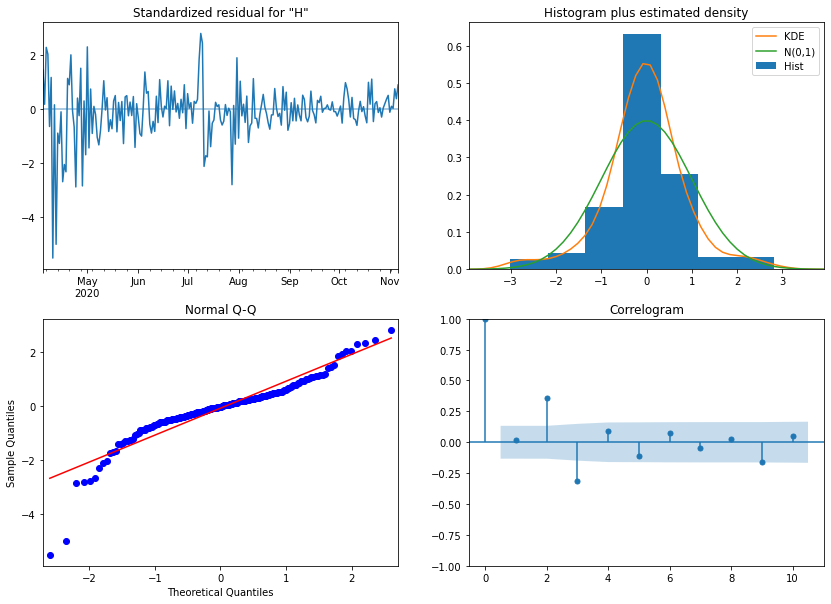

In [238]:
sar_mod.plot_diagnostics(figsize=(14,10))
plt.show()

**TRIPLE EXPONENTIAL SMOOTHING**

In [239]:
from statsmodels.tsa.api import ExponentialSmoothing

In [241]:
tes = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')

In [249]:
tes_model = tes.fit()
tes_model.summary()

Dep. Variable:,Hospitalized,No. Observations:,234
Model:,ExponentialSmoothing,SSE,29466957.348
Optimized:,True,AIC,2769.969
Trend:,Additive,BIC,2807.978
Seasonal:,Additive,AICC,2771.624
Seasonal Periods:,7,Date:,"Tue, 23 Nov 2021"
Box-Cox:,False,Time:,23:59:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9617319,alpha,True
smoothing_trend,0.9572881,beta,True


In [252]:
tes_pred = tes_model.forecast(len(test))
tes_pred

2020-11-07    54710.044379
2020-11-08    55781.175667
2020-11-09    57032.460886
2020-11-10    58643.943445
2020-11-11    60556.932831
2020-11-12    62372.612848
2020-11-13    63832.109488
2020-11-14    65026.193908
2020-11-15    66097.325197
2020-11-16    67348.610416
2020-11-17    68960.092975
2020-11-18    70873.082361
2020-11-19    72688.762378
2020-11-20    74148.259018
2020-11-21    75342.343438
2020-11-22    76413.474727
2020-11-23    77664.759946
2020-11-24    79276.242505
2020-11-25    81189.231891
2020-11-26    83004.911908
2020-11-27    84464.408548
2020-11-28    85658.492968
2020-11-29    86729.624256
2020-11-30    87980.909476
2020-12-01    89592.392035
2020-12-02    91505.381421
2020-12-03    93321.061437
2020-12-04    94780.558078
2020-12-05    95974.642498
2020-12-06    97045.773786
Freq: D, dtype: float64

In [253]:
df_fc['tes_predict'] = tes_pred

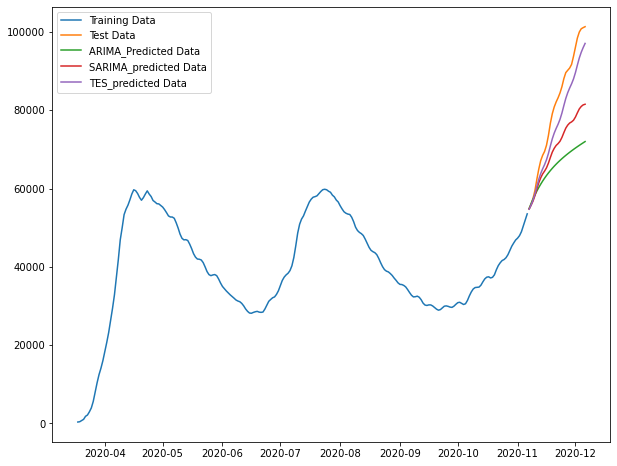

In [254]:
plt.figure(figsize=(10,8))
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(df_fc.index,df_fc['Hospitalized_Forecast'],label='ARIMA_Predicted Data')
plt.plot(df_fc.index,df_fc['sar_forecast'],label='SARIMA_predicted Data')
plt.plot(df_fc.index,df_fc['tes_predict'],label='TES_predicted Data')
plt.legend()
plt.show()

In [256]:
mean_squared_error(df_fc['Hospitalized'],df_fc['tes_predict'],squared=False)

5172.740099751141

In [257]:
MAPE(df_fc['Hospitalized'],df_fc['tes_predict'])

5.542329282757164

**AS MAPE IS LESS IN TRIPLE EXPONENTIAL SMOOTHING SO WE DO FINAL FORECAST USING THE SAME MODEL TES**

In [260]:
tes_final = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')

final_tes = tes_final.fit()

In [261]:
forecast = final_tes.forecast(len(test))
forecast

2020-12-07    101602.206341
2020-12-08    102164.944067
2020-12-09    103057.335027
2020-12-10    103836.576441
2020-12-11    104407.397863
2020-12-12    104821.018220
2020-12-13    105039.380327
2020-12-14    105329.711108
2020-12-15    105892.448834
2020-12-16    106784.839794
2020-12-17    107564.081208
2020-12-18    108134.902630
2020-12-19    108548.522987
2020-12-20    108766.885094
2020-12-21    109057.215875
2020-12-22    109619.953601
2020-12-23    110512.344561
2020-12-24    111291.585975
2020-12-25    111862.407397
2020-12-26    112276.027754
2020-12-27    112494.389861
2020-12-28    112784.720642
2020-12-29    113347.458368
2020-12-30    114239.849328
2020-12-31    115019.090742
2021-01-01    115589.912164
2021-01-02    116003.532522
2021-01-03    116221.894628
2021-01-04    116512.225409
2021-01-05    117074.963135
Freq: D, dtype: float64

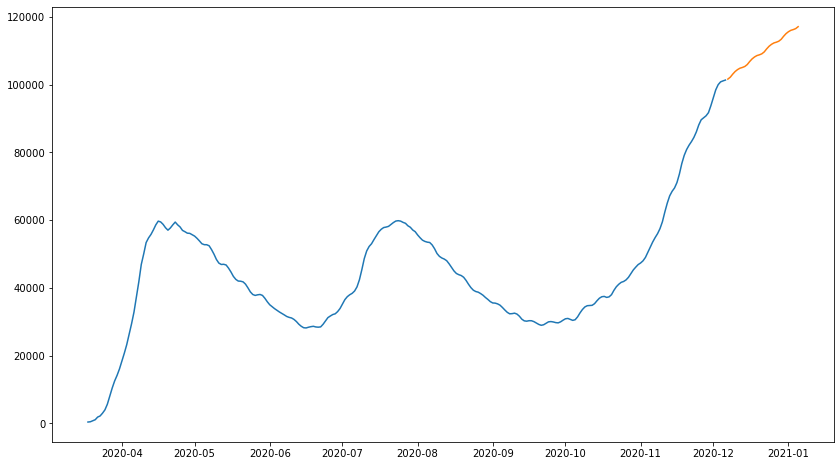

In [262]:
plt.figure(figsize=(14,8))
plt.plot(df,label='GIVEN DATA')
plt.plot(forecast,label='forecasted data')
plt.show()